# CS242 Machine Learning HW5
## Question 1. Support Vector Machine

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

### Generate dataset:

### * Draw 1000 $(x_0, x_1)$ feature vectors from the 2-D Gausssian distribution with mean $\mu_+ = (1, 1)$ and $\Sigma_+ = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}$ and label them +1
### * Draw 1000 $(x_0, x_1)$ feature vectors from the 2-D Gausssian distribution with mean $\mu_+ = (-1, -1)$ and $\Sigma_+ = \begin{bmatrix}3 & 0\\0 & 3\end{bmatrix}$ and label them -1
### * This gives you a 2000 example training set. Repeat the above to draw a test set the same way

In [2]:
mean1 = (1, 1)
cov1 = [[1, 0], [0, 1]]

mean2 = (-1, -1)
cov2 = [[3, 0], [0, 3]]

x_train_pos = np.random.multivariate_normal(mean1, cov1, 1000)
y_train_pos = np.zeros(1000)+1
x_train_neg = np.random.multivariate_normal(mean2, cov2, 1000)
y_train_neg = (np.zeros(1000)+1)*-1
x_train = np.vstack((x_train_pos,x_train_neg))
y_train = np.hstack((y_train_pos,y_train_neg))

x_test_pos = np.random.multivariate_normal(mean1, cov1, 1000)
y_test_pos = np.zeros(1000)+1
x_test_neg = np.random.multivariate_normal(mean2, cov2, 1000)
y_test_neg = (np.zeros(1000)+1)*-1
x_test = np.vstack((x_test_pos,x_test_neg))
y_test = np.hstack((y_test_pos,y_test_neg))

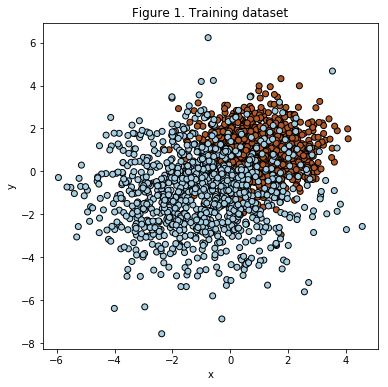

In [3]:
plt.subplots(figsize=(6,6)); plt.ylabel('y'); plt.xlabel('x'); plt.title('Figure 1. Training dataset' )
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
            edgecolors='black')
plt.show()

### (a) With $C = 1$, consider $\gamma \in \{0.1, 1, 10, 100, 1000\}$

### Plot the decision boundary for each value of $\gamma$ and report the number of support vectors found, and the accuracy on the test set

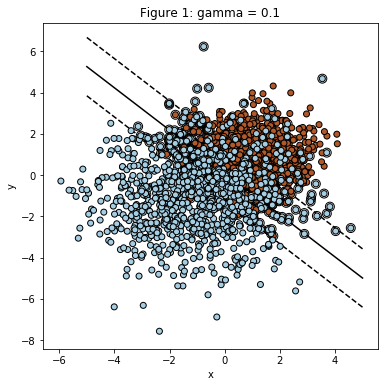

Number of support vectors for each class: [376 376]
Accuracy: 0.8595


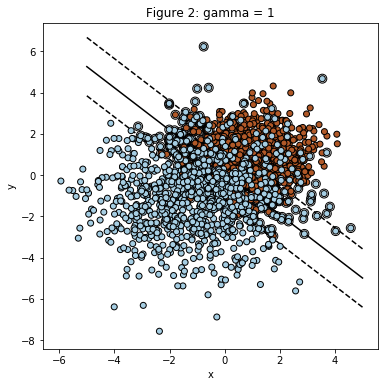

Number of support vectors for each class: [376 376]
Accuracy: 0.8595


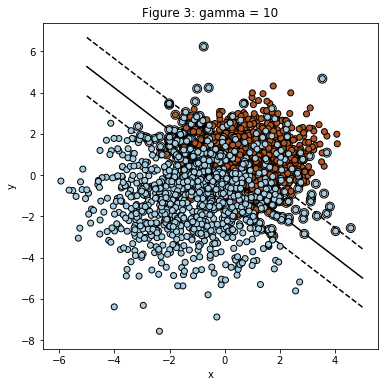

Number of support vectors for each class: [376 376]
Accuracy: 0.8595


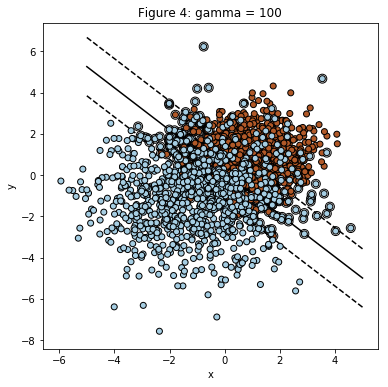

Number of support vectors for each class: [376 376]
Accuracy: 0.8595


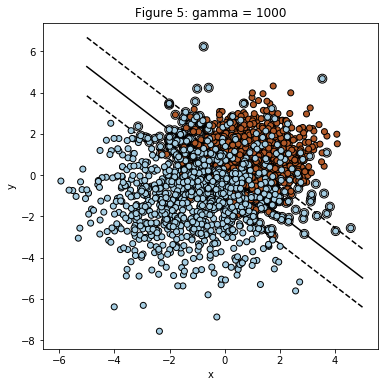

Number of support vectors for each class: [376 376]
Accuracy: 0.8595


In [4]:
gamma = [0.1,1,10,100,1000]
fignum = 1
for g in gamma:
    y_pred = []; accuracy = 0
    clf = svm.SVC(kernel='linear', C=1, gamma=g)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.subplots(figsize=(6,6)); plt.ylabel('y'); plt.xlabel('x'); 
    plt.title('Figure ' + str(fignum) + ': gamma = ' + str(g))
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='black')
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolors='black')

    plt.show()
    print('Number of support vectors for each class: '+str(clf.n_support_))
    print('Accuracy: '+str(accuracy))
    fignum += 1

### (b) With $\gamma = 1$, consider $C \in \{0.1, 1, 10, 100, 1000\}$

### Plot the decision boundary for each value of $C$ and report the number of support vectors found, and the accuracy on the test set

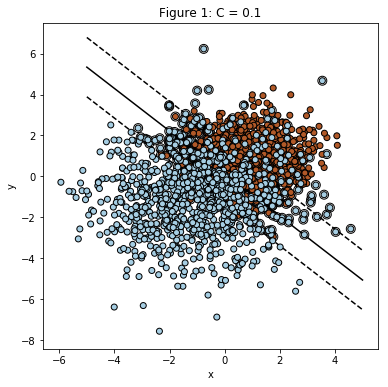

Number of support vectors for each class: [380 380]
Accuracy: 0.8595


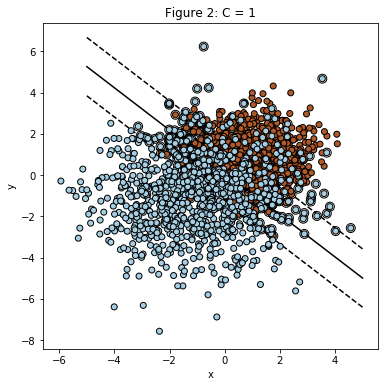

Number of support vectors for each class: [376 376]
Accuracy: 0.8595


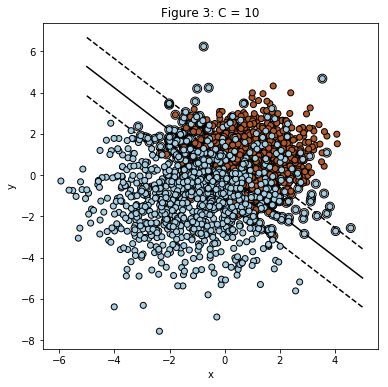

Number of support vectors for each class: [375 376]
Accuracy: 0.8595


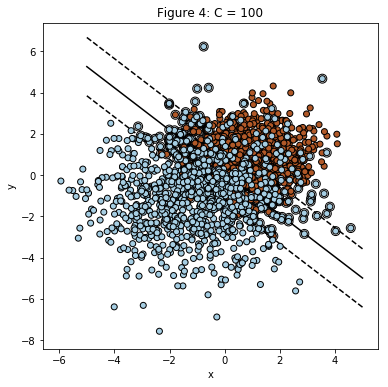

Number of support vectors for each class: [375 376]
Accuracy: 0.8595


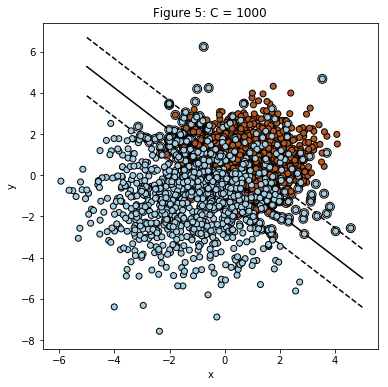

Number of support vectors for each class: [375 376]
Accuracy: 0.8595


In [5]:
C = [0.1,1,10,100,1000]
fignum = 1
for c in C:
    y_pred = []
    clf = svm.SVC(kernel='linear', C=c, gamma=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.subplots(figsize=(6,6)); plt.ylabel('y'); plt.xlabel('x'); 
    plt.title('Figure ' + str(fignum) + ': C = ' + str(c))
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='black')
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolors='black')

    plt.show()
    print('Number of support vectors for each class: '+str(clf.n_support_))
    print('Accuracy: '+str(accuracy))
    fignum += 1